In [118]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

import shapely
import geopandas as gpd

import quickplot as qp

# Examples of moving data between geometries in `geopandas`
An important operation that is available when we work with geospatial data, which is unavailable with any old 'ordinary' data is a **spatial join**. This is where we use the spatial relationships between two data sets to associate attributes from one dataset with the geometries of another. 

In hexbinning, we have already seen a specific example of this, where we *count* the point geometries in a dataset dataset contained by the polygons (i.e., hexagons) of another, and associate those counts with the polygons.

This kind of operation can be translated to other kinds of spatial relationship, and makes uses of the **geopandas** [**`sjoin`**](http://geopandas.org/mergingdata.html#spatial-joins), [**`overlay`**](http://geopandas.org/set_operations.html) or [**`merge`**](http://geopandas.org/mergingdata.html) function, depending on the exact situation. We will look at this in the next few cells of this notebook.

Given the introductory nature of this class, we won't delve into any of these in great detail, partly for lack of time, and partly because things get complicated fast.

OK... Let's read in some datasets.

In [370]:
ca = gpd.read_file('ca-counties-LL.shp')
ufos = gpd.read_file('ufos-2014.geojson')
routes = gpd.read_file('routes.shp')

We are only interested here in California (because *California*), so let's use a simple spatial operation to trim the UFOs data down to size.  Make a whole of California polygon by [**dissolve**](http://geopandas.org/aggregation_with_dissolve.html).  Dissolve is a key operation in geospatial analysis, that allows us to combine multiple geometries into a smaller number of geometries, based on shared attributes.  In this case, we want a single state polygon, so we use the **STATE** attributue of the California counties, which will dissolve them all into one larger polygon.

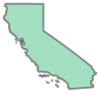

In [376]:
ca_poly = ca.dissolve(by='STATE', as_index=False).geometry[0]
ca_poly

We'll see `dissolve()` again later this week, where we can control how the data associated with each polygon are combined in the new polygon.  For now, we can use this polygon to select only the UFO sitings **within** California.

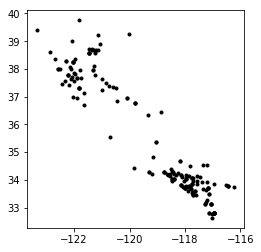

In [377]:
ufo_ca = ufos[ufos.geometry.within(ca_poly)]
qp.quickplot(ufo_ca)

Next before we can proceed, recalling the importance of projections, we need to check out the coordinate reference systems.

In [378]:
ca.crs, ufo_ca.crs, routes.crs

({'init': 'epsg:4326'},
 {'init': 'epsg:4326'},
 {'datum': 'NAD27',
  'lat_0': 0,
  'lat_1': 34,
  'lat_2': 40.5,
  'lon_0': -120,
  'no_defs': True,
  'proj': 'aea',
  'units': 'm',
  'x_0': 0,
  'y_0': -4000000})

They are not all the same, so we should make the county and UFO data sets match the projection of the other one, if we are to overlay them successfully (the projection in that case is *California Albers Equal-Area*.

In [379]:
ca = ca.to_crs(routes.crs)
ufo_ca = ufo_ca.to_crs(routes.crs)

Now we've done all that we can make a map of all these layers on top of one another.

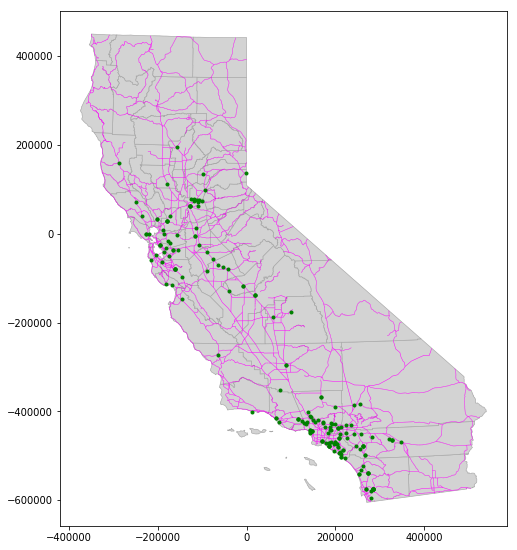

In [387]:
fig = plt.figure(figsize=(8,12))
ax = plt.subplot(111)
ax.set_aspect('equal')
qp.quickplot(ca, facecolor='lightgrey', edgecolor='darkgrey', linewidth=0.65)
qp.quickplot(routes, edgecolor='magenta', linewidth=0.5)
qp.quickplot(ufo_ca, color='green')

## Spatial join
First up, imagine we want to count the numbers of UFO sitings in each California county. To do this we want to first perform a **spatial join** between the county and the UFO data. The code for this is simple enough, although there are a variety of options as discussed in the documentation at [**`sjoin`**](http://geopandas.org/mergingdata.html#spatial-joins).

In [401]:
county_ufo = gpd.sjoin(ca, ufo_ca)
county_ufo

,CENSUSAREA,COUNTY,GEO_ID,Geography,Id,Id2,LSAD,NAME,STATE,geometry,...,pWhite,index_right,cases,city,date,n,reports,shape,state,year
3,2735.085,083,0500000US06083,"Santa Barbara County, California",0500000US06083,6083.0,County,Santa Barbara,06,(POLYGON ((19494.79993769744 -439965.299401893...,...,69.6,842,1,"Isla Vista, CA","February 7, 2014",9628,2,Unknown,CA,2014
5,821.765,095,0500000US06095,"Solano County, California",0500000US06095,6095.0,County,Solano,06,POLYGON ((-198513.8315676559 7056.836398826912...,...,51.0,246,1,"Fairfield, CA","February 2, 2014",9635,4,Disk,CA,2014
5,821.765,095,0500000US06095,"Solano County, California",0500000US06095,6095.0,County,Solano,06,POLYGON ((-198513.8315676559 7056.836398826912...,...,51.0,222,1,"Fairfield, CA","November 14, 2014",8970,5,Circle,CA,2014
5,821.765,095,0500000US06095,"Solano County, California",0500000US06095,6095.0,County,Solano,06,POLYGON ((-198513.8315676559 7056.836398826912...,...,51.0,153,1,"Vacaville, CA","January 21, 2014",9659,5,Circle,CA,2014
5,821.765,095,0500000US06095,"Solano County, California",0500000US06095,6095.0,County,Solano,06,POLYGON ((-198513.8315676559 7056.836398826912...,...,51.0,943,1,"Benicia, CA","March 28, 2014",9512,2,Unknown,CA,2014
5,821.765,095,0500000US06095,"Solano County, California",0500000US06095,6095.0,County,Solano,06,POLYGON ((-198513.8315676559 7056.836398826912...,...,51.0,1097,1,"Fairfield, CA","June 14, 2014",9344,2,Formation,CA,2014
5,821.765,095,0500000US06095,"Solano County, California",0500000US06095,6095.0,County,Solano,06,POLYGON ((-198513.8315676559 7056.836398826912...,...,51.0,1333,1,"Fairfield, CA","September 17, 2014",9083,2,Fireball,CA,2014
8,1843.133,111,0500000US06111,"Ventura County, California",0500000US06111,6111.0,County,Ventura,06,(POLYGON ((52919.62505819418 -445444.056366307...,...,68.7,639,1,"Ventura, CA","August 26, 2014",9146,3,Cigar,CA,2014
8,1843.133,111,0500000US06111,"Ventura County, California",0500000US06111,6111.0,County,Ventura,06,(POLYGON ((52919.62505819418 -445444.056366307...,...,68.7,400,1,"Oxnard, CA","November 27, 2014",8934,4,Fireball,CA,2014
8,1843.133,111,0500000US06111,"Ventura County, California",0500000US06111,6111.0,County,Ventura,06,(POLYGON ((52919.62505819418 -445444.056366307...,...,68.7,717,1,"Simi Valley, CA","November 1, 2014",8988,3,Chevron,CA,2014


The result is a `GeoDataFrame` that has multiple copies of each county (note the NAME and geometry columns), with each row of the table containing the data for both the county *and* the siting, for the county within which the siting took place.  We could actually do this the other way around:

In [402]:
ufo_county = gpd.sjoin(ufo_ca, ca)
ufo_county

,cases,city,date,geometry,n,reports,shape,state,year,index_right,...,STATE,medAge,nPop,pAIAAN,pAfrAmer,pAsian,pFemale,pHispLat,pMale,pWhite
2,1,"Lake Elsinore, CA","January 1, 2014",POINT (247200.9718041753 -477692.4859200902),9717,20,Fireball,CA,2014,42,...,06,33.7,2189641.0,1.1,6.4,6.0,50.2,45.5,49.8,61.0
8,1,"Menifee, CA","July 5, 2014",POINT (261189.5466037412 -476855.1955401301),9250,18,Circle,CA,2014,42,...,06,33.7,2189641.0,1.1,6.4,6.0,50.2,45.5,49.8,61.0
148,1,"Riverside, CA","January 2, 2014",POINT (241076.5351620499 -449885.0453621303),9710,5,Fireball,CA,2014,42,...,06,33.7,2189641.0,1.1,6.4,6.0,50.2,45.5,49.8,61.0
161,1,"Temecula, CA","April 4, 2014",POINT (266730.7592313454 -498515.3583934875),9501,5,Disk,CA,2014,42,...,06,33.7,2189641.0,1.1,6.4,6.0,50.2,45.5,49.8,61.0
199,1,"Menifee, CA","August 27, 2014",POINT (261189.5466037412 -476855.1955401301),9144,5,Cigar,CA,2014,42,...,06,33.7,2189641.0,1.1,6.4,6.0,50.2,45.5,49.8,61.0
316,1,"Beaumont, CA","June 27, 2014",POINT (282256.5200120503 -456984.4469532319),9288,4,Triangle,CA,2014,42,...,06,33.7,2189641.0,1.1,6.4,6.0,50.2,45.5,49.8,61.0
365,1,"Cathedral City, CA","September 12, 2014",POINT (327580.8273417382 -464516.7133641965),9098,4,Circle,CA,2014,42,...,06,33.7,2189641.0,1.1,6.4,6.0,50.2,45.5,49.8,61.0
394,1,"Menifee, CA","November 13, 2014",POINT (261189.5466037412 -476855.1955401301),8971,4,Sphere,CA,2014,42,...,06,33.7,2189641.0,1.1,6.4,6.0,50.2,45.5,49.8,61.0
425,1,"Menifee, CA","January 16, 2014",POINT (261189.5466037412 -476855.1955401301),9674,3,Sphere,CA,2014,42,...,06,33.7,2189641.0,1.1,6.4,6.0,50.2,45.5,49.8,61.0
600,1,"Temecula, CA","July 25, 2014",POINT (266730.7592313454 -498515.3583934875),9213,3,Circle,CA,2014,42,...,06,33.7,2189641.0,1.1,6.4,6.0,50.2,45.5,49.8,61.0


This time around we have a record for each UFO siting (note the geometries are POINTs this time) and attached to each siting are the demographic data from the counties in question.  Note how both tables contain 191 rows (because there are 191 sitings).  A similar approach for each of these data tables will get us to our end goal of the number of sitings in each county, if we again use the `dissolve` function, specifying that we want to **sum** any variables that get dissolved together, this will mean that the **cases** column which is set to 1 for all UFO sitings, will get added together to tell us how many sitings occurred in each county.

In [404]:
county_ufo_counts = county_ufo.dissolve(by='NAME', aggfunc='sum', as_index=False)
county_ufo_counts.head()

,NAME,geometry,CENSUSAREA,Id2,medAge,nPop,pAIAAN,pAfrAmer,pAsian,pFemale,pHispLat,pMale,pWhite,index_right,cases,n,reports,year
0,Alameda,POLYGON ((-203022.147108964 -24406.29581144359...,6651.153,54009.0,329.4,13592439.0,5.4,113.4,234.9,459.0,202.5,441.0,387.0,7317,9,84416,30,18126
1,Butte,POLYGON ((-168847.9811655336 209098.2491991743...,1636.464,6007.0,37.2,220000.0,2.0,1.6,4.1,50.5,14.1,49.5,81.9,494,1,9453,3,2014
2,Colusa,POLYGON ((-172831.3726327177 156960.8253839053...,1150.731,6011.0,33.5,21419.0,2.0,0.9,1.3,48.6,55.1,51.4,64.7,818,1,9654,2,2014
3,Contra Costa,POLYGON ((-198448.8455285591 6855.321671849582...,2863.748,24052.0,154.0,4196100.0,2.4,37.2,57.6,204.8,97.6,195.2,234.4,3754,4,37013,10,8056
4,Fresno,POLYGON ((55756.10517057924 -160244.4617435555...,23831.964,24076.0,122.4,3721800.0,6.8,21.2,38.4,200.0,201.2,200.0,221.6,3225,4,37597,10,8056


Notice that `geopandas` knows nothing about the meaning of each column, so it has dumbly summed the demographic variables turning them into nonsense.  Since we only need the counties and the cases count variable, let's throw everything else away.

In [406]:
county_ufo_counts = county_ufo_counts[['NAME', 'cases']]
county_ufo_counts.head()

,NAME,cases
0,Alameda,9
1,Butte,1
2,Colusa,1
3,Contra Costa,4
4,Fresno,4


For the other joined dataset the same procedure will work:

In [407]:
ufo_county_counts = ufo_county.dissolve(by='NAME', aggfunc='sum', as_index=False)[['NAME', 'cases']]
ufo_county_counts.head()

,NAME,cases
0,Alameda,9
1,Butte,1
2,Colusa,1
3,Contra Costa,4
4,Fresno,4


## Merging datasets

If we want to make a map of this, we now need to **merge** these results back into our original counties dataset.  This takes a few more steps, and is annoying fiddly.

In [410]:
## Merge the counts into the county dataset on the NAME variable, retaining only the geometry
## the NAME, the cases, and nPop
ufos_by_county = ca.merge(county_ufo_counts, on='NAME', how='left')[['geometry', 'NAME', 'cases', 'nPop']]
ufos_by_county.head()

,geometry,NAME,cases,nPop
0,"POLYGON ((200.2238382607345 306850.1626539137,...",Lassen,NaN,34895.0
1,POLYGON ((-40444.04459339708 441660.9794727284...,Modoc,NaN,9686.0
2,(POLYGON ((-265237.20950645 -31089.14800830139...,San Francisco,NaN,805235.0
3,(POLYGON ((19494.79993769744 -439965.299401893...,Santa Barbara,1.0,423895.0
4,POLYGON ((-179.3527407936382 158623.8650718164...,Sierra,NaN,3240.0


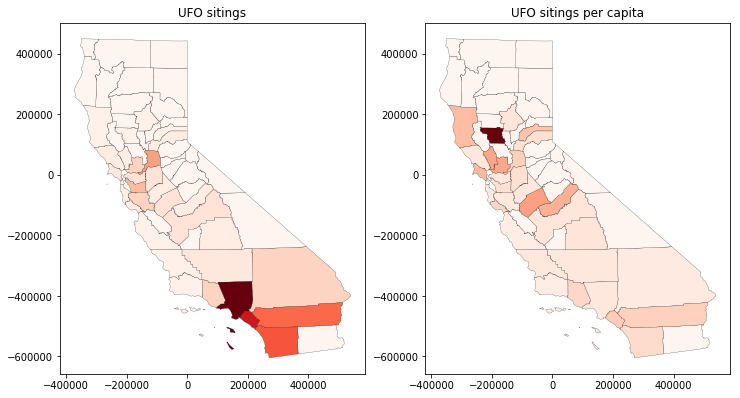

In [412]:
## Some counties will have null values (WHY?) which we have to replace with 0's
ufos_by_county = ufos_by_county.fillna(0)
## Calculate a sitings per 10,000 population
ufos_by_county['ufos_pop'] = ufos_by_county.cases / ufos_by_county.nPop * 10000

fig = plt.figure(figsize=(12,9))
ax = plt.subplot(121)
ax.set_aspect('equal')
ax.set_title('UFO sitings')
qp.quickplot(ufos_by_county, column='cases', cmap='Reds', linewidth=0.2, edgecolor='k')

ax = plt.subplot(122)
ax.set_aspect('equal')
ax.set_title('UFO sitings per capita')
qp.quickplot(ufos_by_county, column='ufos_pop', cmap='Reds', linewidth=0.2, edgecolor='k')

## Joining lines and polygons
Let's see what happens if we join polygons and lines.

In [421]:
county_roads = gpd.sjoin(ca, routes)
county_roads.head()

,CENSUSAREA,COUNTY,GEO_ID,Geography,Id,Id2,LSAD,NAME,STATE,geometry,...,pAIAAN,pAfrAmer,pAsian,pFemale,pHispLat,pMale,pWhite,index_right,RTE,length_km
0,4541.184,035,0500000US06035,"Lassen County, California",0500000US06035,6035.0,County,Lassen,06,"POLYGON ((200.2238382607345 306850.1626539137,...",...,3.5,8.1,1.0,35.8,17.5,64.2,73.2,45,147,17.976803
41,2553.043,063,0500000US06063,"Plumas County, California",0500000US06063,6063.0,County,Plumas,06,"POLYGON ((-12521.5644378867 187813.9477653415,...",...,2.7,1.0,0.7,50.0,8.0,50.0,89.0,45,147,17.976803
0,4541.184,035,0500000US06035,"Lassen County, California",0500000US06035,6035.0,County,Lassen,06,"POLYGON ((200.2238382607345 306850.1626539137,...",...,3.5,8.1,1.0,35.8,17.5,64.2,73.2,167,36,376.022170
7,3179.254,105,0500000US06105,"Trinity County, California",0500000US06105,6105.0,County,Trinity,06,POLYGON ((-284354.9730645804 222760.5842916127...,...,4.8,0.4,0.7,48.4,7.0,51.6,87.3,167,36,376.022170
24,3567.987,023,0500000US06023,"Humboldt County, California",0500000US06023,6023.0,County,Humboldt,06,POLYGON ((-349203.2014796708 348927.4787151013...,...,5.7,1.1,2.2,49.8,9.8,50.2,81.7,167,36,376.022170


This time around we might want to summarize the total length of roads in each county.  Try adding some cells below and making that dataset...

In [431]:
## WRITE SOME CODE TO DISSOLVE THE county_roads data and determine 
## total length of roads in each county

In [432]:
## ONCE YOU'VE DONE THAT, try merging the results into our 
## ufos_by_county dataset to determine ufo sitings per km of road